In [1]:
import pandas as pd
import numpy as np

In [115]:
data = pd.read_csv("/notebooks/course22p2/interview/rtv.csv", low_memory=False)
data.head()

,SubmissionDate,starttime,endtime,version,duration,survey_start,intro_start,district,Surveyor_Name,hhid_2,...,Season 2 Agriculture Value (Ugx),Perennial Agriculture Value (Ugx),Agriculture Income (UGX),Livestock Income / Consumed (Ugx),Livestock Asset Value (UGX),HH Income (UGX),HH Income + Consumption + Residues (UGX),HH Income + Consumption+ Assets + Residues (UGX),Treatment Status,Cohort
0,"Aug 8, 2022 7:49:13 PM","Aug 8, 2022 1:17:13 PM","Aug 8, 2022 1:58:34 PM",2208051941,2455,3.0,3.0,5,97,MIT-KAS-MEB-M7121,...,200000.0,0.0,100000.0,0,0,150000,250000.0,250000.0,Treatment,2020
1,"Aug 2, 2022 10:26:09 PM","Aug 2, 2022 5:05:50 PM","Aug 2, 2022 5:37:13 PM",2208012232,1497,3.0,3.0,5,76,MIT-ITA-BRI-M9815,...,0.0,0.0,0.0,0,0,256000,256000.0,256000.0,Treatment,2020
2,"Aug 9, 2022 7:33:35 PM","Aug 9, 2022 3:39:53 PM","Aug 9, 2022 4:22:40 PM",2208051941,2548,5.0,5.0,5,101,MIT-NYA-KED-M6525,...,0.0,60000.0,0.0,0,0,160000,267000.0,267000.0,Treatment,2020
3,"Aug 6, 2022 2:58:42 PM","Aug 6, 2022 1:29:08 PM","Aug 6, 2022 2:49:20 PM",2208051941,2171,4.0,4.0,5,97,MIT-KAT-AFR-M7293,...,0.0,0.0,196000.0,0,0,196000,272000.0,272000.0,Treatment,2020
4,"Aug 5, 2022 10:27:34 PM","Aug 5, 2022 1:10:14 PM","Aug 5, 2022 1:41:17 PM",2208050902,1861,5.0,5.0,5,97,MIT-BUH-ASA-M13934,...,0.0,0.0,58500.0,0,0,138500,284000.0,284000.0,Treatment,2020


In [34]:
data.shape

(4597, 1410)

In [139]:
# Get the names of the empty columns
empty_cols = data.isna().sum() == len(data)
empty_cols_names = empty_cols.index[empty_cols]
print(empty_cols_names)

Index(['respondent_sex', 'water_treat_method_other', 'bicycle_owned_value_chk',
       'hh_member8_farm', 'member8_chosen_farm', 'work_farm_days8',
       'work_farm_hours8', 'hh_member9_farm', 'member9_chosen_farm',
       'work_farm_days9',
       ...
       'sn_1_Cauliflower_value_add_price', 'sn_1_Cauliflower_cost_Value_Add',
       'sn_1_Black_Nightshade_value_add_price',
       'sn_1_Black_Nightshade_cost_Value_Add',
       'sn_1_Purple_Eggplants_value_add_price',
       'sn_1_Purple_Eggplants_cost_Value_Add', 'sn_1_Soya_value_add_pSoya',
       'sn_1_Soya_cost_Value_Add', 'sn_2_Irish_Potatoes_value_add_price',
       'sn_2_Irish_Potatoes_cost_Value_Add'],
      dtype='object', length=182)


In [140]:
empty_cols_names = empty_cols.index[empty_cols].tolist()
len(empty_cols_names)

182

In [122]:
data['HH Income (UGX)'] = data['HH Income (UGX)'].replace(',', '', regex=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [141]:
y = data['HH Income (UGX)']
X = data.drop(columns=['HH Income (UGX)', 'SubmissionDate', 'starttime', 'endtime', 'KEY']+empty_cols_names)

In [142]:
y = pd.to_numeric(y, errors='coerce')
y

0        150000.0
1        256000.0
2        160000.0
3        196000.0
4        138500.0
          ...    
4592    4650000.0
4593    4040000.0
4594    8570000.0
4595    5726000.0
4596    9055000.0
Name: HH Income (UGX), Length: 4597, dtype: float64

In [143]:
# Separate string and numeric columns
X_str = X.select_dtypes(include="object") # string columns
X_num = X.select_dtypes(exclude="object") # numeric columns

# Encode string columns using label encoder
encoder = LabelEncoder()
for col in X_str.columns:
    X_str[col] = encoder.fit_transform(X_str[col])

# Concatenate string and numeric columns
X = pd.concat([X_str, X_num], axis=1)

In [144]:
X.fillna(X.mean(), inplace=True)

In [145]:
y = y.fillna(y.mean())

In [146]:
y

0        150000.0
1        256000.0
2        160000.0
3        196000.0
4        138500.0
          ...    
4592    4650000.0
4593    4040000.0
4594    8570000.0
4595    5726000.0
4596    9055000.0
Name: HH Income (UGX), Length: 4597, dtype: float64

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

In [148]:
import matplotlib.pyplot as plt 

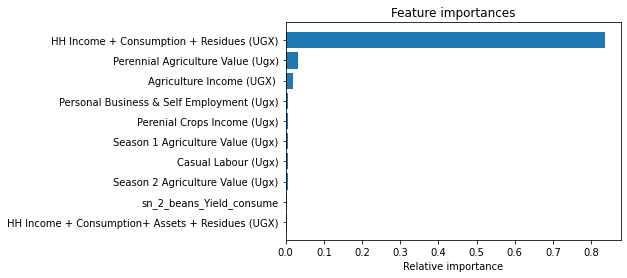

In [149]:
plt.figure()
plt.title("Feature importances")
plt.barh(range(10), importances[indices], align="center")
plt.yticks(range(10), X.columns[indices])
plt.xlabel("Relative importance")
plt.show()

In [152]:
indices = np.argsort(importances)[-8:]

In [153]:
list(X.columns[indices])

['Season 2 Agriculture Value (Ugx)',
 'Casual Labour (Ugx)',
 'Season 1 Agriculture Value (Ugx)',
 'Perenial Crops Income (Ugx)',
 'Personal Business & Self Employment (Ugx)',
 'Agriculture Income (UGX) ',
 'Perennial Agriculture Value (Ugx)',
 'HH Income + Consumption + Residues (UGX)']